In [1]:
from collections import defaultdict
import csv

start_file = "Proposed/route_lifetime_start.txt"
end_file = "Proposed/route_lifetime_end.txt"
output_file = "route_lifetime_proposed_result.txt"

start_times = defaultdict(list)
with open(start_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        start_times[(dest, node)].append(float(time))

end_times = defaultdict(list)
with open(end_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        end_times[(dest, node)].append(float(time))

with open(output_file, "w") as out:
    out.write("Node,Destination,Lifetime_Start,Lifetime_End,Duration\n")
    for key in start_times:
        starts = start_times[key]
        ends = end_times.get(key, [])

        for start_time in starts:
            matched_end = None
            for i, end_time in enumerate(ends):
                if end_time > start_time:
                    matched_end = end_time
                    del ends[i]
                    break
            if matched_end:
                duration = matched_end - start_time
                out.write(f"{key[1]},{key[0]},{start_time:.6f},{matched_end:.6f},{duration:.6f}\n")


In [3]:
from collections import defaultdict
import csv

start_file = "Legacy/route_lifetime_start.txt"
end_file = "Legacy/route_lifetime_end.txt"
output_file = "route_lifetime_Legacy_result.txt"

start_times = defaultdict(list)
with open(start_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        start_times[(dest, node)].append(float(time))

end_times = defaultdict(list)
with open(end_file, "r") as f:
    for line in f:
        dest, node, time = line.strip().split(",")
        end_times[(dest, node)].append(float(time))

with open(output_file, "w") as out:
    out.write("Node,Destination,Lifetime_Start,Lifetime_End,Duration\n")
    for key in start_times:
        starts = start_times[key]
        ends = end_times.get(key, [])

        for start_time in starts:
            matched_end = None
            for i, end_time in enumerate(ends):
                if end_time > start_time:
                    matched_end = end_time
                    del ends[i]
                    break
            if matched_end:
                duration = matched_end - start_time
                out.write(f"{key[1]},{key[0]},{start_time:.6f},{matched_end:.6f},{duration:.6f}\n")


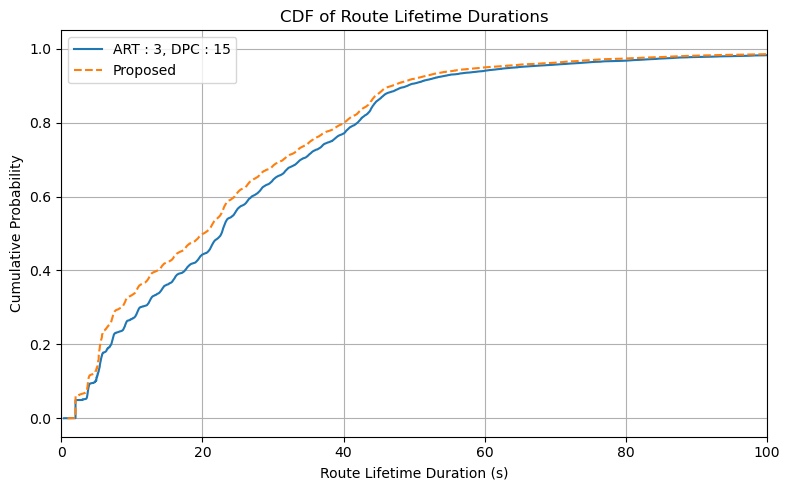

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

legacy_filename = 'route_lifetime_legacy_result.txt'
proposed_filename = 'route_lifetime_proposed_result.txt'

legacy_df = pd.read_csv(legacy_filename)
proposed_df = pd.read_csv(proposed_filename)

lagecy_durations = np.sort(legacy_df["Duration"].values)
proposed_durations = np.sort(proposed_df["Duration"].values)

legacy_cdf = np.arange(1, len(lagecy_durations) + 1) / len(lagecy_durations)
proposed_cdf = np.arange(1, len(proposed_durations) + 1) / len(proposed_durations)

plt.figure(figsize=(8, 5))

#plt.plot(high_durations, high_cdf, linestyle='-', label='ART : 10, DPC :: 30')
plt.plot(lagecy_durations, legacy_cdf, linestyle='-', label='ART : 3, DPC : 15')
#plt.plot(low_durations, low_cdf, linestyle='--', label='ART : 1, DPC : 5')
plt.plot(proposed_durations, proposed_cdf, linestyle='--', label='Proposed')

plt.xlabel("Route Lifetime Duration (s)")
plt.ylabel("Cumulative Probability")
plt.title("CDF of Route Lifetime Durations")
plt.xlim(0, 100)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()
